In [40]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
## Data Load
train = pd.read_csv('/content/drive/MyDrive/kaggle_file/Digit_Recognizer/train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/kaggle_file/Digit_Recognizer/test.csv')
y_train = train['label']
X_train = train.drop('label', axis=1)

In [32]:
## Lable analysis
y_train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [33]:
## Checking Missing Value
X_train.isnull().any(axis=1).describe()
X_test.isnull().any(axis=1).describe()

,0
count,28000
unique,1
top,False
freq,28000


In [34]:
## Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
## Reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [36]:
## Lable to Array
y_train = pd.get_dummies(y_train).astype(int).values
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [39]:
## Train, Val Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=2)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(26880, 28, 28, 1) (6720, 28, 28, 1) (26880, 10) (6720, 10)


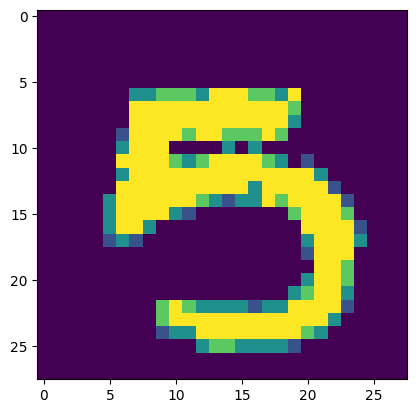

In [45]:
## Data check
plt.imshow(X_train[1035][:,:,0])
plt.show()